In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('/home/saule/ds_bootcamp/Project-/release/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19737 non-null  int64  
 1   rooms                  19737 non-null  object 
 2   adress                 19737 non-null  object 
 3   area                   19737 non-null  object 
 4   building               19737 non-null  object 
 5   parking                19737 non-null  object 
 6   price                  19737 non-null  object 
 7   description            19737 non-null  object 
 8   repair                 19737 non-null  object 
 9   rooms_square           19737 non-null  object 
 10  balcony                19737 non-null  object 
 11  windows                19737 non-null  object 
 12  bathroom               19737 non-null  object 
 13  сhildren/pets_allowed  19737 non-null  object 
 14  additionally           19737 non-null  object 
 15  ho

In [3]:
df['price'] = df['price'].str.split('.').apply(lambda x: x[0] if isinstance(x, list) and len(x) > 1 else None)
df.head()

,id,rooms,adress,area,building,parking,price,description,repair,rooms_square,balcony,windows,bathroom,сhildren/pets_allowed,additionally,housing_complex,ceiling_height,elevator,garbage_chute,floor_count
0,271271157,4,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,500000,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,20.0,Лоджия (1),Во двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да,16
1,271634126,4,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,500000,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,Балкон (1),На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет,16
2,271173086,"4, Оба варианта","Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,500000,"ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,116.0,Балкон (1),На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.2,Пасс (1),Нет,16
3,272197456,"4, Оба варианта","Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,400000,ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,Балкон (1),На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",0,3.2,Пасс (1),Да,6
4,273614615,2,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",Unknown,225000,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,Лоджия (1),На улицу и двор,Совмещенный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,3.9,"Пасс (1), Груз (1)",Да,26


Text(0, 0.5, 'Цена аренды')

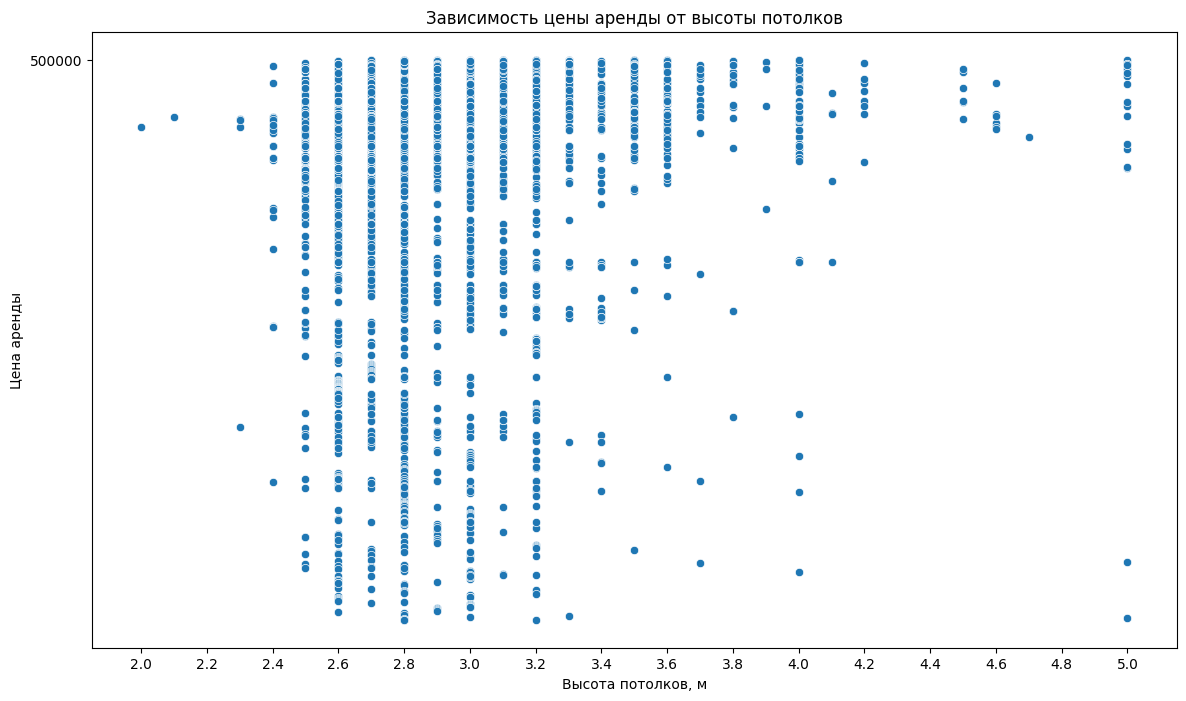

In [4]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='ceiling_height', y='price', data=df)
plt.title('Зависимость цены аренды от высоты потолков')
#plt.ylim(::10000)
plt.gca().yaxis.set_major_locator(MultipleLocator(5000))
plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
plt.xlabel('Высота потолков, м')
plt.ylabel('Цена аренды')

In [8]:
df['price'].max()

'99999'

In [5]:
#Кодировка значений высоты потолка. Т.к. если потолок выше 3.2, то основная доля стоимости аренды находиться в высшем диапазоне, то им присваивается большее значение.
def ceiling_code(height):
    if height <= 3.2: 
        return 1
    if 3.21 <= height <= 4.0:
        return 2
    if height >= 4.1:
        return 3
    else:
        return height

In [6]:
df['ceiling_coding'] = df['ceiling_height'].apply(ceiling_code)  #Заменить на ceiling_height